In [1]:
import torch
import torch.nn as nn
import numpy as np

import matplotlib.pyplot as plt 
%matplotlib inline

In [2]:
nPerClust = 100
blur = 1

A = [1,1]
B = [5,1]

a = [ A[0]+np.random.randn(nPerClust)*blur, A[1]+np.random.randn(nPerClust)*blur]
b = [ B[0]+np.random.randn(nPerClust)*blur, B[1]+np.random.randn(nPerClust)*blur]

labels_np = np.vstack((np.zeros((nPerClust,1)),np.ones((nPerClust,1))))

data_np = np.hstack((a,b)).T

data = torch.tensor(data_np).float()
labels = torch.tensor(labels_np).float()



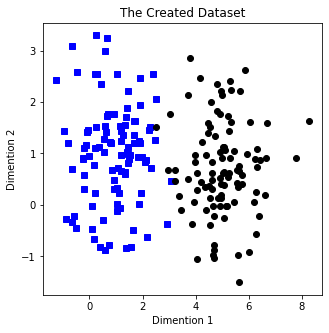

In [3]:
fig = plt.figure(figsize=(5,5))
plt.plot(data[np.where(labels==0)[0],0],data[np.where(labels==0)[0],1],'bs')
plt.plot(data[np.where(labels==1)[0],0],data[np.where(labels==1)[0],1],'ko')
plt.title('The Created Dataset')
plt.xlabel('Dimention 1')
plt.ylabel('Dimention 2')
plt.show();